## **Predicción del Nivel de PIB utilizando Datos del Banco Mundial**

El objetivo de este proyecto es predecir el nivel de PIB de distintos países a partir de indicadores económicos, sociales y demográficos obtenidos del Banco Mundial.

El trabajo debe realizarse en tres etapas principales:

- Etapa 1: Análisis descriptivo e imputación de datos

- Etapa 2: Reducción de dimensionalidad con PCA

- Etapa 3: Modelación mediante algoritmos de clasificación

### **Etapa Previa**:

En github debe crear un repositorio llamado portfolios. Además debe crear tres ramas para cada una de las etapas. Recuerde que la rama  `main` debe contener todas las actualizaciones de su código por medio de una unión entre las ramas de las etapas junto con la rama principal.


En esta etapa inicial, se deberá configurar correctamente la estructura del proyecto utilizando GitHub como sistema de control de versiones.
- Crear un repositorio en GitHub con el nombre `portafolio`
- En el archivo `README.md` debe describir claramente la finalidad del proyecto. Puede apoyarse en las indicaciones descritas acá como referencia inicial; sin embargo, el contenido debe ser reformulado y contextualizado, de modo que el repositorio refleje un proyecto original, coherente y concebido por usted, tanto en su propósito como en su enfoque.
- A partir de la rama main, crear tres ramas, cada una asociada a una etapa del trabajo (por ejemplo: `etapa-1`, `etapa-2`, `etapa-3`). Cada rama deberá contener exclusivamente los avances correspondientes a su respectiva etapa.
- Realizar la extracción inicial de los datos desde la fuente del Banco Mundial y subir estos datos al repositorio en una carpeta denominada `main`.

**Indicaciones**
- Una vez finalizada cada etapa, los cambios desarrollados en la rama correspondiente deberán integrarse a la rama `main` mediante un proceso de unión (`merge`).
- La rama `main` debe reflejar, en todo momento, la versión más actualizada y consolidada del proyecto.


### **Etapa 1: Análisis Descriptivo e Imputación de Datos**

**Revisión general del dataset**

- Identificar el número de países, años y variables disponibles.

- Número total de observaciones

- Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

- Identificación de outliers relevantes

- Otras observaciones relevantes.


**Indicaciones**:

- Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

- Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

- Mapa con la distribución del PIB

- Discretizar la variable dependiente `NY.GDP.MKTP.PP.KD` de aceurdo con la siguiente indicación.

    ```python
    df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

    ```

- Enviar a Github a la rama 1 el notebook ejecutado en esta etapa.

    **Nota**: Debe describir de manera clara y ordenada los pasos realizados durante el desarrollo del proyecto, incorporando una breve justificación para cada uno de ellos, de modo que se expliciten las decisiones adoptadas y su coherencia con los objetivos planteados.

    Esta indicación es válida para todas las etapas del proyecto.

In [1]:
%pip install wbgapi

In [2]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/ciencia de datos para la economia/')

import my_func as fn

In [4]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [5]:
# Descarga de datos
datos = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [6]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [7]:
#Seleccionar solamente paises.
datos = datos[datos['country'].isin(iso_list)].reset_index(drop = True)

In [8]:
import pandas as pd
datos['NY.GDP.MKTP.PP.KD'] = pd.qcut(datos['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [9]:
datos.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313



**Etapa 1: Análisis Descriptivo e Imputación de Datos**

Revisión general del dataset




###**Identificar el número de países, años y variables disponibles.**

**lo primero que veremos sera cuantas filas (paises) tiene la base de datos**

In [10]:

paises = datos.shape[0]
print(f"La base de datos tiene {paises} países.")




La base de datos tiene 198 países.


la base de datos cuenta con 198 filas, osea que representa que la base de datos tiene 198 países.

**numero de columnas de la base de datos, para ver cuales son las variables**

In [11]:
#numero de columnas de la base de datos
columnas = datos.shape[1]
print(f"La base de datos tiene {columnas} columnas.")


La base de datos tiene 67 columnas.


hay 67 columnas en la base de datos, pero en 2 columnas solamente indica cual es el pais y tambien como el codigo o la palabra
mas corta del pais, entonces hay 65 variables o columnas que si tiene informacion que puede ser relevante para el estudio.

In [12]:
#nombres de todas las columnas
columnas = datos.columns
columnas

Index(['country', 'Country', 'NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL',
       'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN',
       'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS',
       'SL.TLF.TOTL.FE.ZS', 'SL.TLF.TOTL.IN', 'SL.UEM.TOTL.FE.NE.ZS',
       'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS',
       'SL.UEM.TOTL.NE.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS',
       'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS',
       'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS',
       'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD', 'SL.UEM.TOTL.ZS',
       'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD',
       'NE.CON.PRVT.CN', 'NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN',
       'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'BM.KLT.DINV.CD.WD',
       'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC',
       'EN.GHG.CO2.IP.MT.CE.AR5', 'GC.DOD.TOTL.CN', 'GC.DOD.T

en la base de datos se indica que se filtro la base de datos con el año 2023, eso sale cuando uno ejecuta la base de datos.

###**Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.**

**nan por columna en porcentaje, para poder ver si eliminamos o podemos imputar esa variable**

In [13]:
nan_por_columna = datos.isna().mean()*100
nan_por_columna



,0
country,0.000000
Country,0.000000
NY.GDP.MKTP.PP.KD,0.000000
SP.POP.GROW,0.000000
SP.POP.TOTL,0.000000
...,...
EG.CFT.ACCS.RU.ZS,8.080808
EG.CFT.ACCS.UR.ZS,8.080808
IT.NET.USER.FE.ZS,71.212121
IT.NET.USER.MA.ZS,71.212121


**eliminar columnas con más de 15% de NaN**

In [14]:
datos= datos.drop(columns=nan_por_columna[nan_por_columna > 15].index, errors='ignore')
datos

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,3.050000e+07,1.684321,0.9636,30.7,65.013,62.775,60.226,7.5,77.0,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,1.532150e+08,2.324653,1.2905,9.2,68.673,66.349,63.936,2.3,16.8,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,3.159065e+06,0.580098,NaN,NaN,71.502,65.170,59.691,NaN,NaN,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,-1.550000e+09,4.264071,50.1898,98.7,79.264,74.588,69.877,98.7,99.4,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,4.399200e+06,0.830619,0.0011,20.6,73.927,71.477,69.445,9.0,52.3,45.7313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,AGO,Angola,Medium-High,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,3.335616e+07,-1.977864,1.7977,50.2,67.144,64.617,62.099,8.4,75.0,44.7581
194,AND,Andorra,Low,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,2.215940e+08,7.285975,NaN,100.0,86.107,84.041,82.100,100.0,100.0,95.4456
195,DZA,Algeria,High,1.498976,46164219.0,22614984.0,48.988123,23549235.0,51.011877,2.241995,...,1.655830e+08,0.489819,16.3884,99.7,77.696,76.261,74.895,99.1,99.9,76.9081
196,ALB,Albania,Medium-Low,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,2.627767e+08,6.900370,0.8186,86.1,81.446,79.602,77.728,72.5,95.2,83.1356


podemos observar que nos quedamos con 41 variables, entonces eso quiere decir que se borraron 26 columnas
que tenian mas de 15% de NaN

In [15]:
nan_por_columna2 = datos.isna().mean()*100
nan_por_columna2

,0
country,0.000000
Country,0.000000
NY.GDP.MKTP.PP.KD,0.000000
SP.POP.GROW,0.000000
SP.POP.TOTL,0.000000
SP.POP.TOTL.FE.IN,0.000000
SP.POP.TOTL.FE.ZS,0.000000
SP.POP.TOTL.MA.IN,0.000000
SP.POP.TOTL.MA.ZS,0.000000
SP.URB.GROW,0.000000


**imputacion: en los valores que tienen NaN los rempazaremos por la mediana, ya que con esta medida puede seguir con la
distribucion de los datos.**

In [16]:
#imputacion:
columnasnumericas= datos.select_dtypes(include=['float64', 'int64']).columns
datos[columnasnumericas] = datos[columnasnumericas].fillna(datos[columnasnumericas].median())
datos.isna().sum().sum()




np.int64(0)


###**Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.**

con esta tabla podemos ver cuales son sus principales medidas de locacion para poder visualizar mejor, sus promedios, su máximo o mínimo, y asi poder tomar decisiones o siemplemente ver las diferencias entre las variables.

In [17]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
SP.POP.GROW,198.0,1.152752e+00,1.576210e+00,-8.423008e+00,2.828784e-01,1.112108e+00,2.088224e+00,6.527050e+00
SP.POP.TOTL,198.0,3.999611e+07,1.484957e+08,9.816000e+03,1.373786e+06,7.335048e+06,2.936413e+07,1.438070e+09
SP.POP.TOTL.FE.IN,198.0,1.987776e+07,7.252840e+07,4.795000e+03,6.876850e+05,3.672054e+06,1.403224e+07,6.961863e+08
SP.POP.TOTL.FE.ZS,198.0,4.997349e+01,2.993389e+00,2.848374e+01,4.965188e+01,5.032928e+01,5.118944e+01,5.492088e+01
SP.POP.TOTL.MA.IN,198.0,2.011836e+07,7.598056e+07,5.021000e+03,6.826450e+05,3.560820e+06,1.424457e+07,7.418833e+08
SP.POP.TOTL.MA.ZS,198.0,5.002651e+01,2.993389e+00,4.507912e+01,4.881056e+01,4.967072e+01,5.034812e+01,7.151626e+01
SP.URB.GROW,198.0,1.729545e+00,1.826024e+00,-8.348151e+00,4.523152e-01,1.524572e+00,2.700316e+00,8.105580e+00
SP.URB.TOTL,198.0,2.289674e+07,8.019058e+07,6.283000e+03,8.540478e+05,4.463172e+06,1.624560e+07,9.244403e+08
SP.URB.TOTL.IN.ZS,198.0,6.220539e+01,2.272253e+01,1.505810e+01,4.336186e+01,6.362252e+01,7.954610e+01,1.000000e+02
SL.TLF.TOTL.FE.ZS,198.0,4.230033e+01,8.493360e+00,6.846247e+00,4.097022e+01,4.508194e+01,4.735822e+01,5.467084e+01


###**Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.**

primero lo que haremos, sera dejar nuestra variable principal que es el PIB, como una variable mas facil de manejar para poder realizar nuestras descriptivas, cambiando el nombre, y asi tambien poder viasualizar su distribución. es por eso que agregamos el PIB como una variable numerica. y tambien, haremos un histograma del PIB para ver la frecuencia y tambien un boxplot para ver los datos atipicos (outliers)

In [24]:
pib_num = wb.data.DataFrame(
    ['NY.GDP.MKTP.PP.KD'],
    economy=datos['country'].unique().tolist(),
    time=2021
).reset_index()

pib_num = pib_num.rename(columns={'NY.GDP.MKTP.PP.KD': 'PIB_num'})

# Merge con dataset principal
datos = datos.merge(
    pib_num[['economy', 'PIB_num']],
    left_on='country',
    right_on='economy',
    how='left'
)

datos[['country', 'PIB_num']].head()


,country,PIB_num
0,ZWE,7.625453e+10
1,ZMB,6.867212e+10
2,PSE,2.787813e+10
3,VNM,1.192059e+12
4,VUT,9.591521e+08


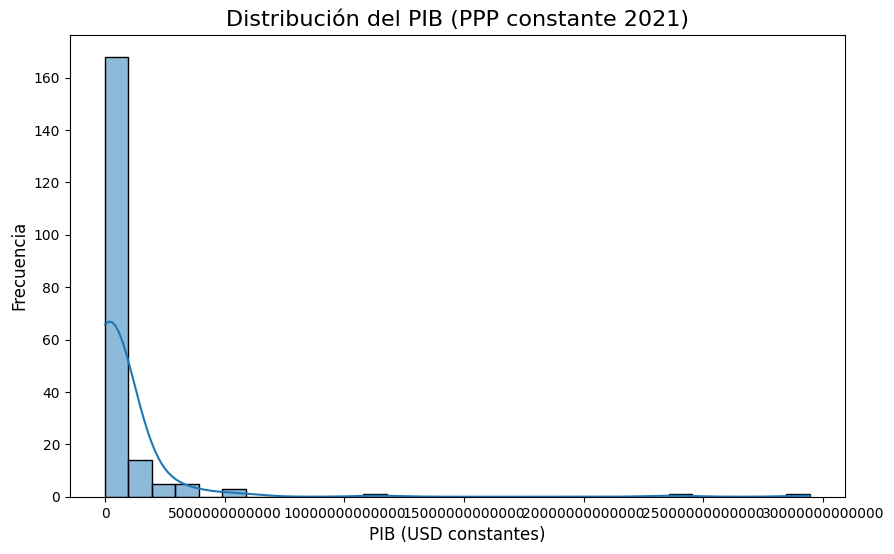

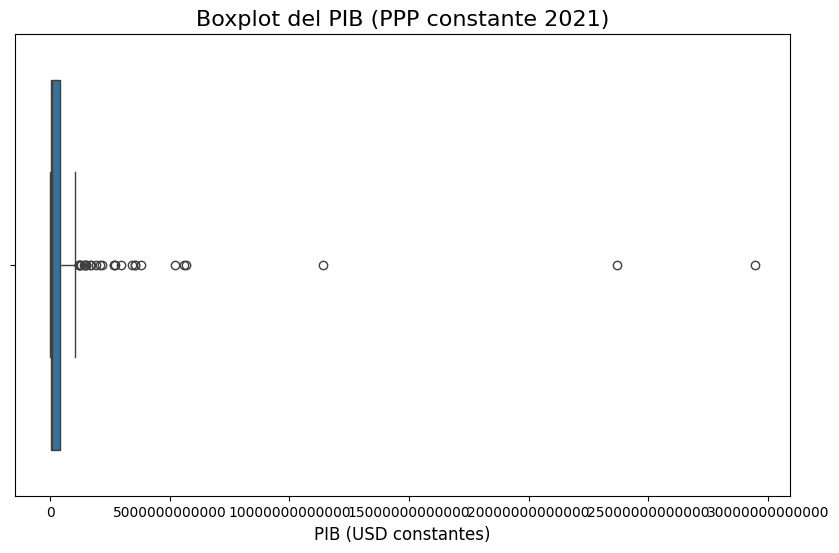

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


# histograma
plt.figure(figsize=(10, 6))
sns.histplot(datos['PIB_num'], kde=True, bins=30)
plt.title('Distribución del PIB (PPP constante 2021)', fontsize=16)
plt.xlabel('PIB (USD constantes)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=datos['PIB_num'])
plt.title('Boxplot del PIB (PPP constante 2021)', fontsize=16)
plt.xlabel('PIB (USD constantes)', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

**Mapa con la distribución del PIB**
haremos un mapa para visualizar el PIB en los paises del mundo y su distribucion, principalmente sirve para hacer inferencia y sacar conclusiones de la distribución entre los países

In [26]:
import plotly.express as px

fig = px.choropleth(
    datos,
    locations='country',
    color='PIB_num',
    hover_name='Country',
    color_continuous_scale='Viridis',
    title='Distribución del PIB (PPP, constante 2021)'
)

fig.show()


In [ ]:
datos

### **Etapa 2: Reducción de Dimensionalidad con PCA**

El dataset contiene múltiples variables macroeconómicas, demográficas y sociales, por lo que se aplicará Análisis de Componentes Principales (`PCA`) con el objetivo de reducir la dimensionalidad y capturar los principales patrones subyacentes en los datos.

- Seleccionar únicamente variables numéricas y estandarizarlas previamente.
- Aplicar `PCA` y analizar la varianza explicada por cada componente.
- Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.
- Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.
- Documentar de forma clara los pasos realizados y las decisiones metodológicas adoptadas.


para poder estandarizar la base de datos tenemos que eliminar las variables categoricas para poder realizarlo, o sino no funcionaria la estandarización, y tambien borraremos la variable creamos del PIB numerico porque esa va a ser la variable que queremos estudiar.

In [27]:
# solo seleccioné las variables numericas y eliminé la columna PIB numerico
df_num = datos.select_dtypes(include=['int64', 'float64']).drop(columns=['PIB_num'])
df_num

,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SL.TLF.TOTL.FE.ZS,...,BM.KLT.DINV.CD.WD,BX.KLT.DINV.WD.GD.ZS,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS
0,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,6420625.0,39.291937,49.843240,...,3.050000e+07,1.684321,0.96360,30.7,65.013,62.775,60.226,7.50,77.0,38.4266
1,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,9331708.0,45.028585,46.170619,...,1.532150e+08,2.324653,1.29050,9.2,68.673,66.349,63.936,2.30,16.8,33.0000
2,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,4486873.0,86.857687,45.081945,...,3.159065e+06,0.580098,1.40855,91.5,71.502,65.170,59.691,84.15,97.6,86.6377
3,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,38264181.0,38.129890,48.623244,...,-1.550000e+09,4.264071,50.18980,98.7,79.264,74.588,69.877,98.70,99.4,78.0800
4,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,71340.0,22.265197,46.126995,...,4.399200e+06,0.830619,0.00110,20.6,73.927,71.477,69.445,9.00,52.3,45.7313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,25670362.0,69.851503,49.450638,...,3.335616e+07,-1.977864,1.79770,50.2,67.144,64.617,62.099,8.40,75.0,44.7581
194,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,71816.0,88.820161,45.081945,...,2.215940e+08,7.285975,1.40855,100.0,86.107,84.041,82.100,100.00,100.0,95.4456
195,1.498976,46164219.0,22614984.0,48.988123,23549235.0,51.011877,2.241995,34499817.0,74.732808,16.830056,...,1.655830e+08,0.489819,16.38840,99.7,77.696,76.261,74.895,99.10,99.9,76.9081
196,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,1405259.0,58.210609,44.994435,...,2.627767e+08,6.900370,0.81860,86.1,81.446,79.602,77.728,72.50,95.2,83.1356


entonces ahora que dejamos solamente las variables numericas, podemos estandarizar para queden los datos como en una misma forma de medición,

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)


Ahora aplicamos el PCA, nos sirve para ver que tan explicativas son las variables con lo que queremos estudiar, en este caso el PIB, y todo esto a base de sus varianzas y la varianza acomulada. y esto nos sirve para ver en que cantidad se captura o extrae de una buena forma la información de a base de datos.

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)
#varianza explicada
varianza_explicada= pca.explained_variance_ratio_

#varianza acomulada
import numpy as np
#para que lo podamos visualizar de una mejor forma.

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
varianza_acumulada
varianza_df = pd.DataFrame({
    "Componente": np.arange(1, len(varianza_explicada) + 1),
    "Varianza_Explicada": varianza_explicada,
    "Varianza_Acumulada": varianza_acumulada
})

varianza_df.head(10)




,Componente,Varianza_Explicada,Varianza_Acumulada
0,1,0.263110,0.263110
1,2,0.210908,0.474018
2,3,0.109364,0.583382
3,4,0.087478,0.670860
4,5,0.075738,0.746598
5,6,0.044740,0.791338
6,7,0.033765,0.825103
7,8,0.029673,0.854776
8,9,0.028373,0.883149
9,10,0.026002,0.909151


**Elegir el número de componentes necesarias para explicar entre 70% y 90% de la varianza total, justificando brevemente dicha elección.**

el numero de componentes que explican entre un 70% y 90% de la varianza total, lo vemos para poder ver cual es la mejor opcion con la dimensionalidad de los datos y tanbien con la capacidad de concentración de los datos.

In [30]:
n_comp_70 = np.argmax(varianza_acumulada >= 0.70) + 1
n_comp_70

n_comp_90 = np.argmax(varianza_acumulada >= 0.90) + 1
n_comp_90

print(f"El número de componentes necesarios para explicar al menos 70% de la varianza total es: {n_comp_70}")
print(f"El número de componentes necesarios para explicar al menos 90% de la varianza total es: {n_comp_90}")


El número de componentes necesarios para explicar al menos 70% de la varianza total es: 5
El número de componentes necesarios para explicar al menos 90% de la varianza total es: 10


podemos ver que el numero de componentes para el 70% serian 5 y el 90% serian 10 y eso mas adelante nos puede servir para ver  cuantas variables puedan tener nuestros modelos.

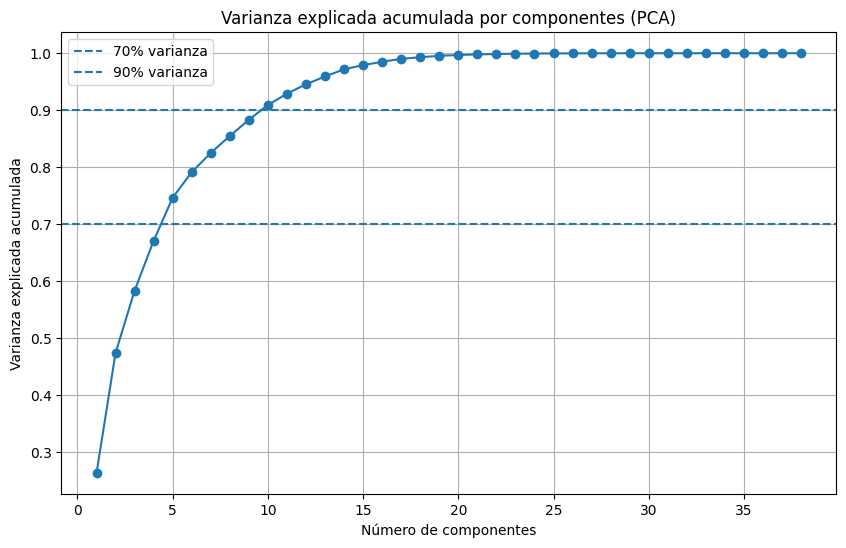

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Varianza explicada acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1),
         varianza_acumulada,
         marker='o')
plt.axhline(y=0.70, linestyle='--', label='70% varianza')
plt.axhline(y=0.90, linestyle='--', label='90% varianza')

plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por componentes (PCA)')
plt.legend()
plt.grid(True)
plt.show()


aqui con este grafico podemos visualizar la cantidad de componentes o variables que estan en nuestra base de datos.

**Construir un nuevo DataFrame que contenga las componentes seleccionadas, el cual será utilizado como insumo para los modelos de clasificación posteriores.**

In [32]:
from sklearn.decomposition import PCA
import pandas as pd

pca_70 = PCA(n_components=n_comp_70)
componentes_70 = pca_70.fit_transform(df_scaled)

columnas_70 = [f'PC{i+1}' for i in range(n_comp_70)]
df_pca_70 = pd.DataFrame(componentes_70, columns=columnas_70)

df_pca_70["PIB_nivel"] = datos["NY.GDP.MKTP.PP.KD"].values

df_pca_70


,PC1,PC2,PC3,PC4,PC5,PIB_nivel
0,-1.824413,-3.718461,-0.139753,1.201409,-0.206234,Medium
1,-1.848223,-3.861049,-0.202842,-0.814425,-0.276063,Medium
2,-0.841066,-0.284357,-0.042718,-0.170836,0.166311,Medium-Low
3,1.216174,0.301010,0.993765,-0.286240,-2.085039,High
4,-1.649400,-2.790831,-0.277981,-0.867607,-0.669647,Low
...,...,...,...,...,...,...
193,-1.341225,-2.742902,0.349610,1.051821,2.091605,Medium-High
194,0.330916,3.485633,-0.380759,-1.164526,0.008049,Low
195,0.268943,1.046391,0.985922,0.340453,3.028583,High
196,-0.145278,1.992967,-0.252489,2.069957,-0.240478,Medium-Low


creamos un dataframe para poder en la parte 3 del exámen ver los modelos y aplicar ya con nuestras variables designadas y viendo cuales son las mejores opciones. ademas podemos decir que en esta tiene la informacion ya clasificada y es

**Etapa Final: Implementación y Comparación de Modelos de Clasificación**

En esta etapa final del proyecto se procede a la implementación de modelos de clasificación, con el propósito de evaluar el efecto de la reducción de dimensionalidad sobre el desempeño predictivo y la estructura del problema. Las fases de proyecto son las siguientes:

En primer lugar, se construyen dos modelos de clasificación utilizando el conjunto de datos original, es decir, considerando la totalidad de las variables explicativas sin aplicar técnicas de reducción de dimensionalidad. Esta aproximación permite establecer una línea base (baseline) para el análisis comparativo posterior.

Posteriormente, se desarrollan los mismos modelos de clasificación empleando como variables de entrada las componentes principales obtenidas en la etapa de reducción de dimensionalidad mediante PCA. De esta forma, se evalúa si la representación reducida de los datos logra preservar información relevante para la tarea de clasificación.

Ambos enfoques se implementan bajo condiciones metodológicas comparables, manteniendo criterios consistentes de partición de datos y métricas de evaluación. El desempeño de los modelos se analiza mediante indicadores adecuados al problema de clasificación, permitiendo contrastar los resultados obtenidos con datos originales y con datos reducidos.


Finalmente, se realiza un análisis comparativo de los resultados, discutiendo las ventajas y limitaciones de cada enfoque, así como el impacto del uso de PCA en términos de desempeño, interpretabilidad y complejidad del modelo. Esta etapa cierra el proyecto integrando los aprendizajes obtenidos a lo largo de las fases previas y fundamentando las decisiones analíticas adoptadas.

###**En primer lugar, se construyen dos modelos de clasificación utilizando el conjunto de datos original, es decir, considerando la totalidad de las variables explicativas sin aplicar técnicas de reducción de dimensionalidad. Esta aproximación permite establecer una línea base (baseline) para el análisis comparativo posterior.**

utilazaremos dos modelos, nosotros decimos utilizar los modelos de random forest y regresión logistica, lo ultilazaremos ya con los datos estandarizados y tambien ya aplicado el modelo PCA.

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, ConfusionMatrixDisplay,
                             cohen_kappa_score, roc_auc_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##random forest

In [162]:
# Importar biblioteca
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



X_original = df_pca_70.drop(columns=['PIB_nivel'])
y_original = df_pca_70['PIB_nivel']


X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.3, random_state=42, stratify=y_original)


In [163]:
#@title Instanciar algoritmo de clasificación RFC
rfc_clf = RandomForestClassifier(
    random_state=0,
    class_weight="balanced",
    n_estimators=100
)
# Aplicar modelo a datos de entrenamietno
classifier = rfc_clf.fit(X_train, y_train)


In [164]:
#@title Generar predicciones con datos test
y_pred_rfc = classifier.predict(X_test)

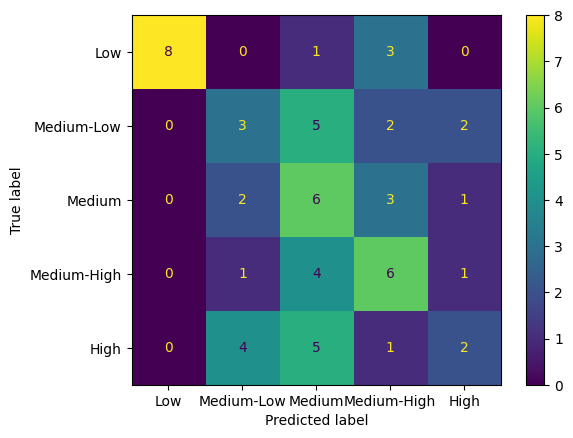

In [165]:
matrizxconfucion = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)

display_labels = y_test.cat.categories
ConfusionMatrixDisplay(matrizxconfucion, display_labels=display_labels).plot()
plt.show()

In [166]:
def fn_metricas_clasificacion(y_true, y_pred):
  print('Accuracy     : %.3f' % accuracy_score(y_true, y_pred))
  print("Precisión    : {}".format(precision_score(y_true, y_pred, pos_label=1, average='weighted')))
  print("Recall       : {}".format(recall_score(y_true, y_pred,pos_label=1, average='weighted')))
  print("Puntuación F1: {}".format(f1_score(y_true, y_pred,pos_label=1, average='weighted')))
  print("Cohen Kappa  : {}".format(cohen_kappa_score(y_true, y_pred)))


In [167]:
fn_metricas_clasificacion(y_test, y_pred_rfc)

Accuracy     : 0.417
Precisión    : 0.46380952380952384
Recall       : 0.4166666666666667
Puntuación F1: 0.42060606060606065
Cohen Kappa  : 0.27083333333333337


por las metricas, podemos ver que el modelo clasifica correctamente el 41% de los paises. y tiene un nivel de precision de 46%.

In [168]:
#@title Mostrar Reporte
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

        High       1.00      0.67      0.80        12
         Low       0.30      0.25      0.27        12
      Medium       0.29      0.50      0.36        12
 Medium-High       0.40      0.50      0.44        12
  Medium-Low       0.33      0.17      0.22        12

    accuracy                           0.42        60
   macro avg       0.46      0.42      0.42        60
weighted avg       0.46      0.42      0.42        60



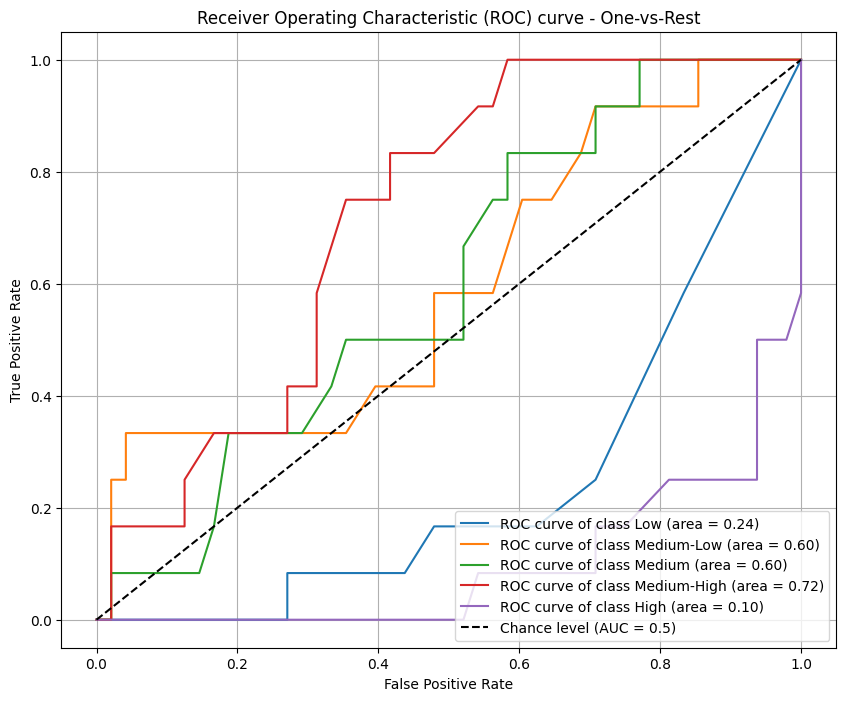

In [169]:
#@title Curva ROC (Multi-clase - One-vs-Rest)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=y_test.cat.categories)
n_classes = y_test_bin.shape[1]

# Get decision function scores for each class
# Use predict_proba for Random Forest
y_score = rfc_clf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {y_test.cat.categories[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve - One-vs-Rest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [43]:
datos

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,EN.GHG.CO2.IP.MT.CE.AR5,EG.CFT.ACCS.ZS,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.ZS,economy,PIB_num
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,0.96360,30.7,65.013,62.775,60.226,7.50,77.0,38.4266,ZWE,7.625453e+10
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,1.29050,9.2,68.673,66.349,63.936,2.30,16.8,33.0000,ZMB,6.867212e+10
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,1.40855,91.5,71.502,65.170,59.691,84.15,97.6,86.6377,PSE,2.787813e+10
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,50.18980,98.7,79.264,74.588,69.877,98.70,99.4,78.0800,VNM,1.192059e+12
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,0.00110,20.6,73.927,71.477,69.445,9.00,52.3,45.7313,VUT,9.591521e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,AGO,Angola,Medium-High,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,4.233833,...,1.79770,50.2,67.144,64.617,62.099,8.40,75.0,44.7581,AGO,3.060361e+11
194,AND,Andorra,Low,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,1.506784,...,1.40855,100.0,86.107,84.041,82.100,100.00,100.0,95.4456,AND,4.649509e+09
195,DZA,Algeria,High,1.498976,46164219.0,22614984.0,48.988123,23549235.0,51.011877,2.241995,...,16.38840,99.7,77.696,76.261,74.895,99.10,99.9,76.9081,DZA,6.488956e+11
196,ALB,Albania,Medium-Low,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,-0.946506,...,0.81860,86.1,81.446,79.602,77.728,72.50,95.2,83.1356,ALB,4.534567e+10


##**Arbol de decisión: ocuparemos otro modelo predictivo y de forma categorica**

In [100]:
#@title Instanciar algoritmo de clasificación usando criterio de entropía y ajustar modelo.
from sklearn.tree import DecisionTreeClassifier

arbol_clf = DecisionTreeClassifier(criterion="entropy", random_state=111)

# Aplicar modelo a datos de entrenamiento
arbol_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=111)

Accuracy del modelo Árbol de Decisión (datos con PCA): 0.3167

Reporte de Clasificación (datos con PCA):
              precision    recall  f1-score   support

        High       0.62      0.42      0.50        12
         Low       0.29      0.42      0.34        12
      Medium       0.25      0.33      0.29        12
 Medium-High       0.25      0.25      0.25        12
  Medium-Low       0.29      0.17      0.21        12

    accuracy                           0.32        60
   macro avg       0.34      0.32      0.32        60
weighted avg       0.34      0.32      0.32        60



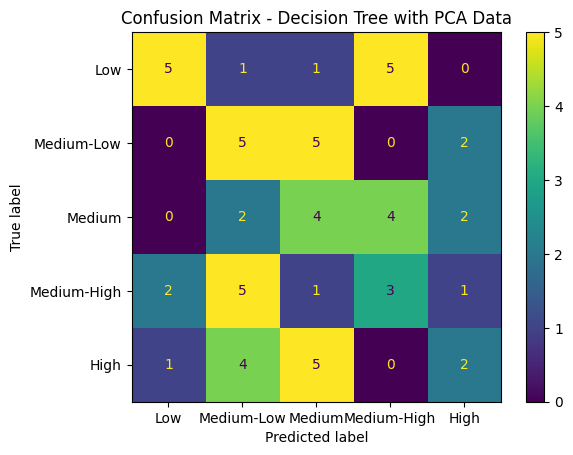

In [105]:
# Preparar los datos para el modelo con PCA (70% de varianza explicada)
# X_pca and y_pca should already be defined from the Random Forest PCA step

# Instantiate and train the Decision Tree model with PCA data
arbol_clf_pca = DecisionTreeClassifier(criterion="entropy", random_state=111)

# Apply model to PCA training data
arbol_clf_pca.fit(X_train_pca, y_train_pca)

# Generate predictions on PCA test data
y_pred_arbol_pca = arbol_clf_pca.predict(X_test_pca)

# Evaluate the Decision Tree model with PCA data
print(f"Accuracy del modelo Árbol de Decisión (datos con PCA): {accuracy_score(y_test_pca, y_pred_arbol_pca):.4f}")
print("\nReporte de Clasificación (datos con PCA):")
print(classification_report(y_test_pca, y_pred_arbol_pca))

# Generar matriz de confusión para el modelo con PCA
cm_arbol_pca = confusion_matrix(y_true=y_test_pca, y_pred=y_pred_arbol_pca)
display_labels_arbol_pca = y_test_pca.cat.categories
ConfusionMatrixDisplay(cm_arbol_pca, display_labels=display_labels_arbol_pca).plot()
plt.title('Confusion Matrix - Decision Tree with PCA Data')
plt.show()

In [111]:

print(f"Accuracy del modelo Árbol de Decisión (datos con PCA): {accuracy_score(y_test_pca, y_pred_arbol_pca):.4f}")
print("\nReporte de Clasificación (datos con PCA):")
print(classification_report(y_test_pca, y_pred_arbol_pca))


Accuracy del modelo Árbol de Decisión (datos con PCA): 0.3167

Reporte de Clasificación (datos con PCA):
              precision    recall  f1-score   support

        High       0.62      0.42      0.50        12
         Low       0.29      0.42      0.34        12
      Medium       0.25      0.33      0.29        12
 Medium-High       0.25      0.25      0.25        12
  Medium-Low       0.29      0.17      0.21        12

    accuracy                           0.32        60
   macro avg       0.34      0.32      0.32        60
weighted avg       0.34      0.32      0.32        60



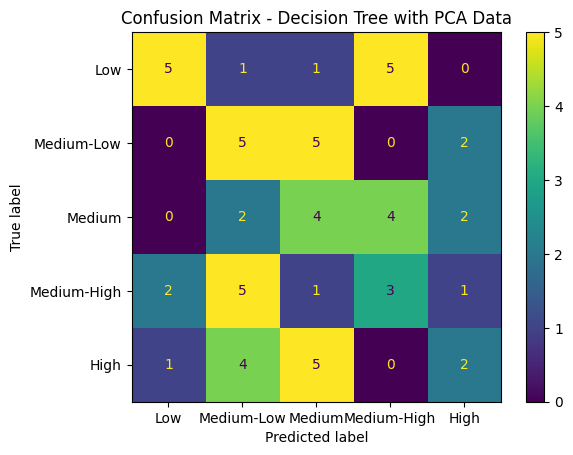

In [112]:
# Generar matriz de confusión para el modelo con PCA
cm_arbol_pca = confusion_matrix(y_true=y_test_pca, y_pred=y_pred_arbol_pca)
display_labels_arbol_pca = y_test_pca.cat.categories
ConfusionMatrixDisplay(cm_arbol_pca, display_labels=display_labels_arbol_pca).plot()
plt.title('Confusion Matrix - Decision Tree with PCA Data')
plt.show()

In [174]:
from sklearn.metrics import roc_auc_score

y_score_pca_arbol = arbol_clf_pca.predict_proba(X_test_pca)

roc_auc_pca_arbol = roc_auc_score(y_test_pca, y_score_pca_arbol, multi_class='ovr', average='weighted')
print(f"AUC modelo Árbol de Decisión (datos con PCA): {roc_auc_pca_arbol:.3f}")

AUC modelo Árbol de Decisión (datos con PCA): 0.573


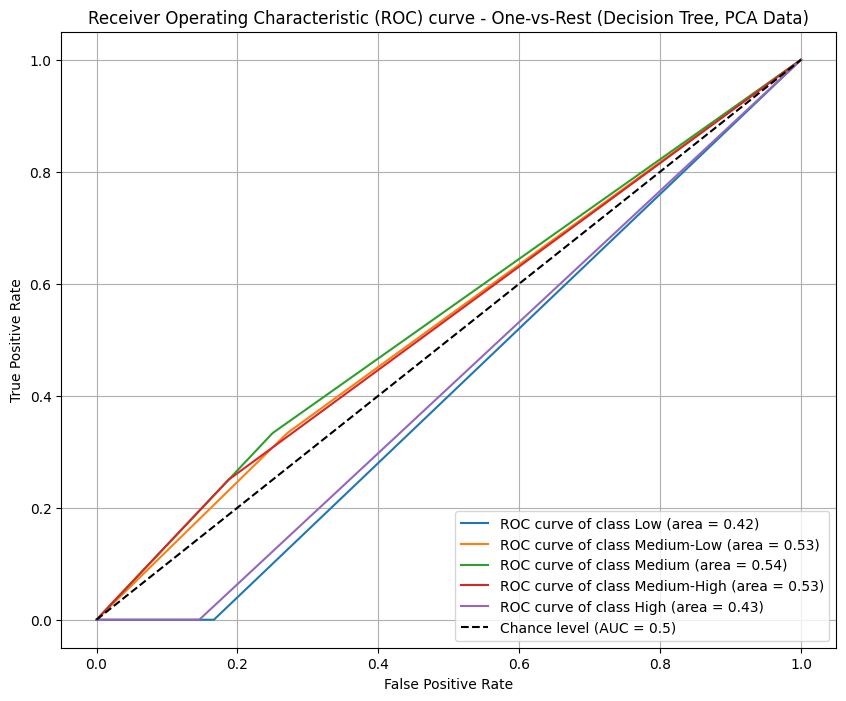

In [176]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output using the PCA test target
y_test_pca_bin = label_binarize(y_test_pca, classes=y_test_pca.cat.categories)
n_classes_pca = y_test_pca_bin.shape[1]

# Get decision function scores for each class using the PCA model
y_score_pca = arbol_clf_pca.predict_proba(X_test_pca)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes_pca):
    fpr, tpr, _ = roc_curve(y_test_pca_bin[:, i], y_score_pca[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {y_test_pca.cat.categories[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve - One-vs-Rest (Decision Tree, PCA Data)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#random forest con datos del conjunto original

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

In [179]:
# Importar biblioteca
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X_original = X_scaled
y_original = datos['NY.GDP.MKTP.PP.KD']


X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.3, random_state=42, stratify=y_original)

In [182]:
#@title Instanciar algoritmo de clasificación RFC
rfc_clf = RandomForestClassifier(
    random_state=0,
    class_weight="balanced",
    n_estimators=100
)
# Aplicar modelo a datos de entrenamietno
classifier = rfc_clf.fit(X_train, y_train)
#@title Generar predicciones con datos test
y_pred_rfc = classifier.predict(X_test)



matriz de

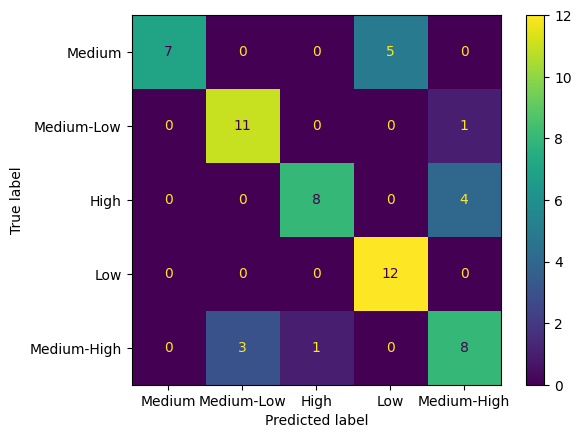

Accuracy     : 0.767
Precisión    : 0.7991740285857933
Recall       : 0.7666666666666667
Puntuación F1: 0.7624973840436635
Cohen Kappa  : 0.7083333333333333


In [183]:
#@title Generar matriz de confusión
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_rfc)
ConfusionMatrixDisplay(cm, display_labels=['Medium', 'Medium-Low', 'High', 'Low', 'Medium-High']).plot()
plt.show()





#@title Mostrar métricas
fn_metricas_clasificacion(y_test, y_pred_rfc)

              precision    recall  f1-score   support

        High       1.00      0.58      0.74        12
         Low       0.79      0.92      0.85        12
      Medium       0.89      0.67      0.76        12
 Medium-High       0.71      1.00      0.83        12
  Medium-Low       0.62      0.67      0.64        12

    accuracy                           0.77        60
   macro avg       0.80      0.77      0.76        60
weighted avg       0.80      0.77      0.76        60



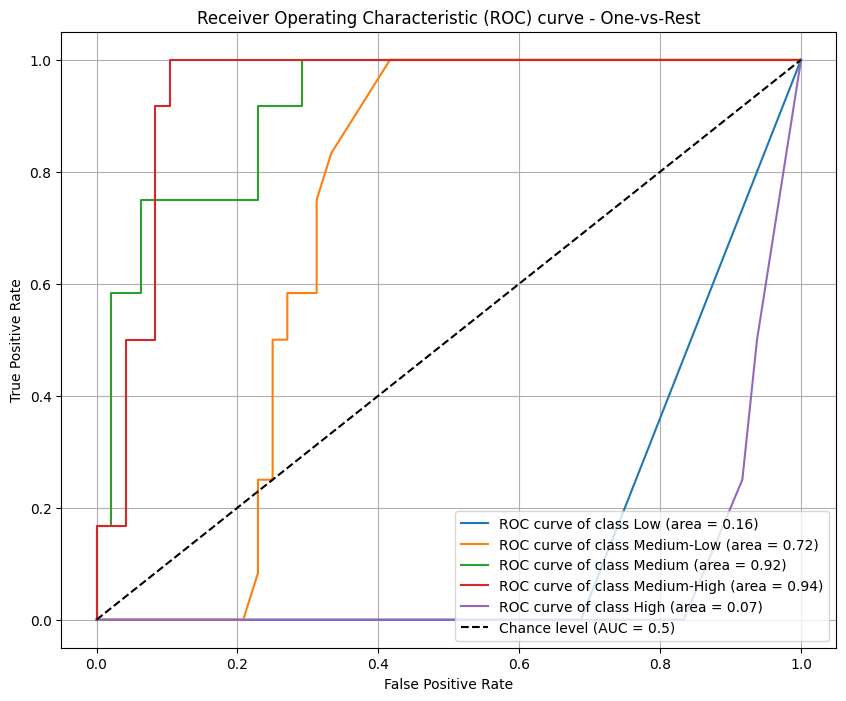

In [185]:
#@title Mostrar Reporte
print(classification_report(y_test, y_pred_rfc))








#@title Curva ROC (Multi-clase - One-vs-Rest)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=y_test.cat.categories)
n_classes = y_test_bin.shape[1]

# Get decision function scores for each class
# Use predict_proba for Random Forest
y_score = rfc_clf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {y_test.cat.categories[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve - One-vs-Rest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

arbol de decision

In [186]:
#@title Instanciar algoritmo de clasificación usando criterio de entropía y ajustar modelo.
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=111)

# Aplicar modelo a datos de entrenamietno
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=111)

In [187]:
#@title Mostrar métricas
fn_metricas_clasificacion(y_test, y_test_pred)





#@title Mostrar Reporte
print(classification_report(y_test, y_test_pred))

Accuracy     : 0.683
Precisión    : 0.7116666666666667
Recall       : 0.6833333333333333
Puntuación F1: 0.6712664242076006
Cohen Kappa  : 0.6041666666666667
              precision    recall  f1-score   support

        High       0.90      0.75      0.82        12
         Low       0.62      0.83      0.71        12
      Medium       0.80      0.33      0.47        12
 Medium-High       0.73      0.92      0.81        12
  Medium-Low       0.50      0.58      0.54        12

    accuracy                           0.68        60
   macro avg       0.71      0.68      0.67        60
weighted avg       0.71      0.68      0.67        60



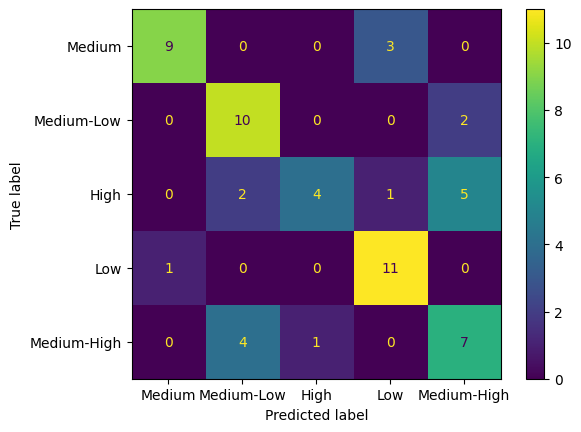

In [188]:
#@title Generar predicciones a datos de test
y_test_pred = tree_clf.predict(X_test)







#@title Generar matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm, display_labels=['Medium', 'Medium-Low', 'High', 'Low', 'Medium-High']).plot()
plt.show()


In [189]:
#Area bajo la curva
# Pass the full probability array for multiclass ROC AUC
pred_prob = tree_clf.predict_proba(X_test)
# Ensure labels are explicitly provided for multiclass roc_auc_score
roc_auc = roc_auc_score(y_test, pred_prob, multi_class="ovo", labels=tree_clf.classes_)
print(f"AUC modelo base: {roc_auc:.3f}")




AUC modelo base: 0.802


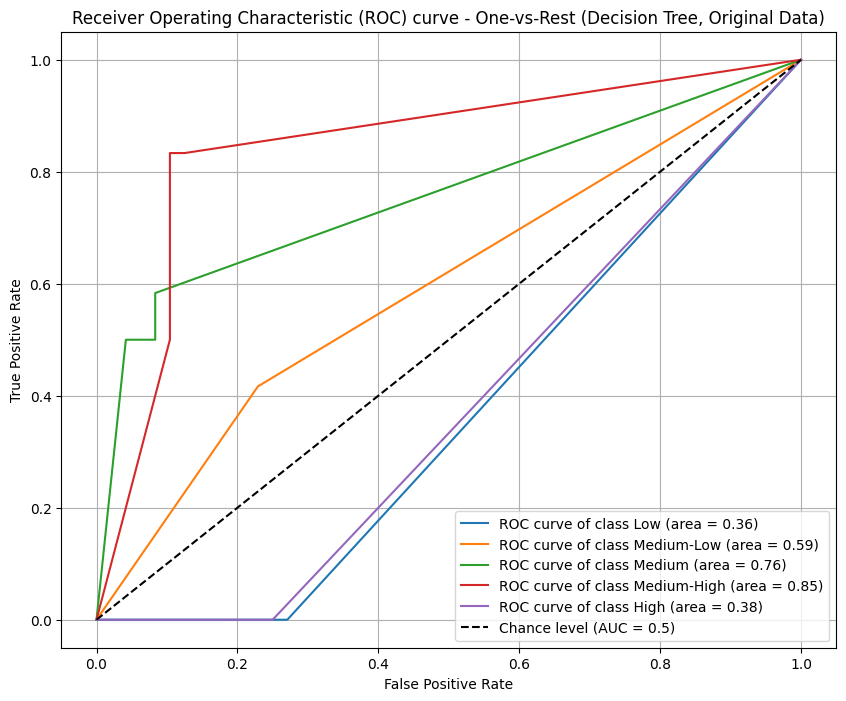

In [198]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(y_test, classes=y_test.cat.categories)
n_classes = y_test_bin.shape[1]

# Get decision function scores for each class
y_score = modelo_final.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve of class {y_test.cat.categories[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve - One-vs-Rest (Decision Tree, Original Data)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [192]:
# Generar las particiones

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Generar diccionario con los hiperparámetros a aplicar
param_grid = {"criterion":["gini", "entropy"],
              "max_depth":[4,6,8,10],
              "min_samples_split":[6,8,10,15]}

# Instanciar el modelo sin hiperparámetros
tree = DecisionTreeClassifier(class_weight="balanced",random_state=0)

# Aplicar GridSearchCV  usando el diccionario de hiperparámetros
mejor_modelo_arbol = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)
# Entrenar el modelo con datos train
mejor_modelo_arbol.fit(X_train, y_train)

# Obtener los mejores parámetros
mejor_modelo_arbol.best_params_

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8}

In [195]:
#@title Obtener el mejor modelo
modelo_final = mejor_modelo_arbol.best_estimator_

# Obtener predicciones con el set de test
y_pred = modelo_final.predict(X_test)

# Imprimir reporte de clasificación
print(classification_report(y_test, y_pred))





#@title Métricas del modelo
fn_metricas_clasificacion(y_test, y_pred)

              precision    recall  f1-score   support

        High       0.88      0.58      0.70        12
         Low       0.56      0.75      0.64        12
      Medium       0.60      0.50      0.55        12
 Medium-High       0.62      0.83      0.71        12
  Medium-Low       0.50      0.42      0.45        12

    accuracy                           0.62        60
   macro avg       0.63      0.62      0.61        60
weighted avg       0.63      0.62      0.61        60

Accuracy     : 0.617
Precisión    : 0.6325000000000001
Recall       : 0.6166666666666667
Puntuación F1: 0.6114285714285714
Cohen Kappa  : 0.5208333333333333


al final podemos concluir que los modelos, usando los datos con estandarizados, pero no aplicando el PCA tienen una mejor variabilidad de los datos, ya que al final explican que tienen mas variables en su modelo, ya que el PCA solamente tiene 5

###